In [1]:
'''
loading libs
'''
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''
loading images
'''
nevus_filepath = 'data/0/'
melanoma_filepath = 'data/1/'

nevus_files = [f for f in os.listdir(nevus_filepath) if os.path.isfile(nevus_filepath+f)]
melanoma_files = [f for f in os.listdir(melanoma_filepath) if os.path.isfile(melanoma_filepath+f)]
# sort filenames
nevus_files = sorted(nevus_files)
melanoma_files = sorted(melanoma_files)

N = 1000
nevus_imgs = [plt.imread(os.path.join(nevus_filepath, nevus_files[i])) for i in range(N)]
melanoma_imgs = [plt.imread(os.path.join(melanoma_filepath, melanoma_files[i])) for i in range(N)]

# resize
nevus_imgs = [cv2.resize(img,(256,256)) for img in nevus_imgs]
melanoma_imgs = [cv2.resize(img,(256,256)) for img in melanoma_imgs]

nevus_imgs = np.array(nevus_imgs)
melanoma_imgs = np.array(melanoma_imgs)

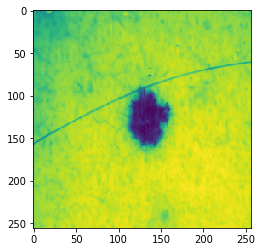

In [3]:
plt.imshow(nevus_imgs[13])

In [12]:
data = nevus_imgs

(0, 8100)

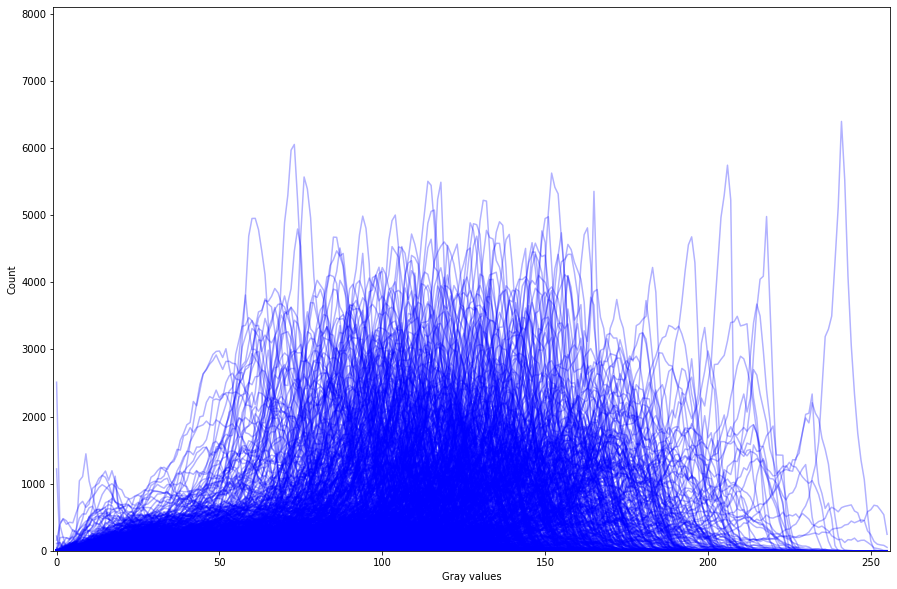

In [13]:
Hs = []
N = 1000

for k in range(N):
    h = np.zeros(256)
    i = 0
    for val in np.unique(data[k]):
        h[i] = np.sum(data[k] == val)
        i+=1
    Hs += [h]

plt.figure(figsize=(15,10))
for i in range(N): 
    plt.plot(Hs[i], 'b', alpha=0.3)
plt.xlabel('Gray values')
plt.ylabel('Count')
plt.xlim(-1,256)
plt.ylim(0, 8100)

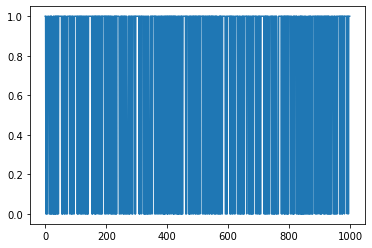

In [38]:
cond = []
for h in Hs:
    cond += [np.sum(h[:127]) > np.sum(h[127:])]

plt.plot(cond)

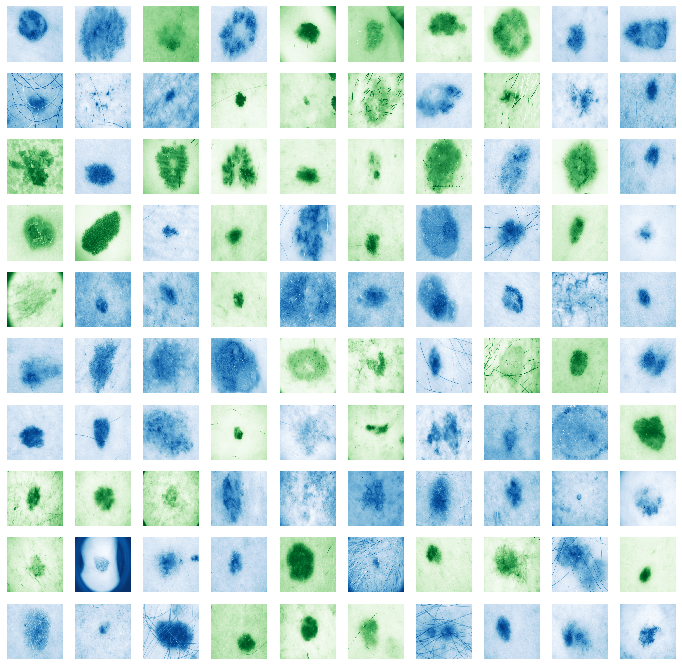

In [11]:
size = (10,10)
fig, ax = plt.subplots(size[0],size[1], figsize=(12,12))
k = 0
for i in range(size[0]):
    for j in range(size[1]):
        if cond[k]:
            ax[i,j].imshow(data[k], 'Blues_r')
        else:
            ax[i,j].imshow(data[k], 'Greens_r')
        ax[i,j].axis('off')
        k+=1

(0, 2236.5)

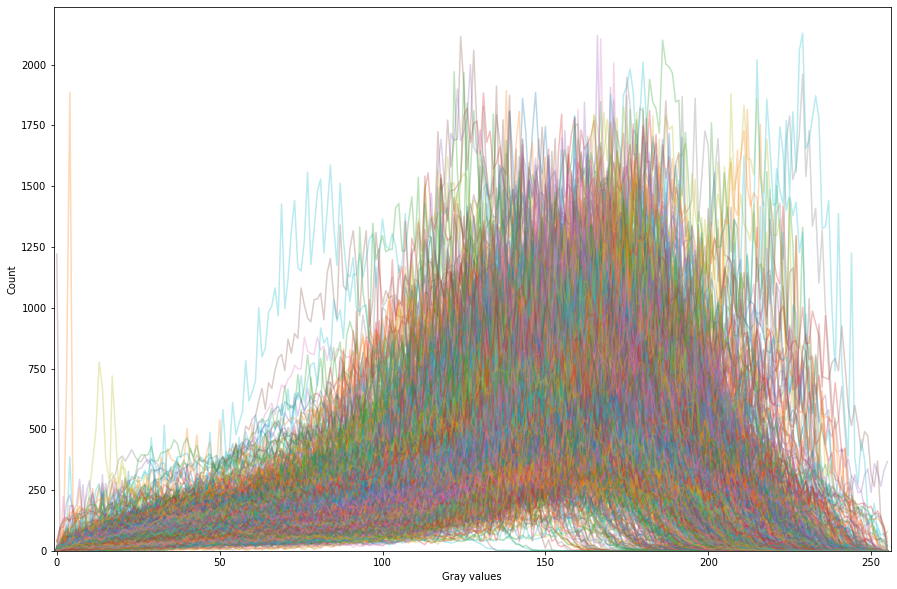

In [7]:
def norm_hist(img):    
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(4,4))
    return clahe.apply(img)
    
norm_data = [norm_hist(img) for img in data]

norm_Hs = []

for k in range(N):
    h = np.zeros(256)
    i = 0
    for val in np.unique(norm_data[k]):
        h[i] = np.sum(norm_data[k] == val)
        i+=1
    norm_Hs += [h]

plt.figure(figsize=(15,10))
for i in range(N): 
    plt.plot(norm_Hs[i], alpha=0.3)
plt.xlabel('Gray values')
plt.ylabel('Count')
plt.xlim(-1,256)
plt.ylim(0)

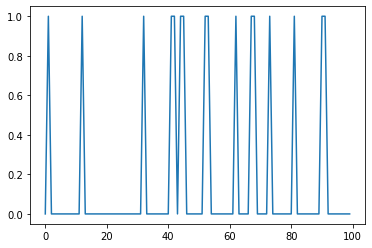

In [18]:
cond = []
split_point = 130
for h in norm_Hs:
    cond += [np.sum(h[:split_point]) > np.sum(h[split_point:])]

plt.plot(cond)

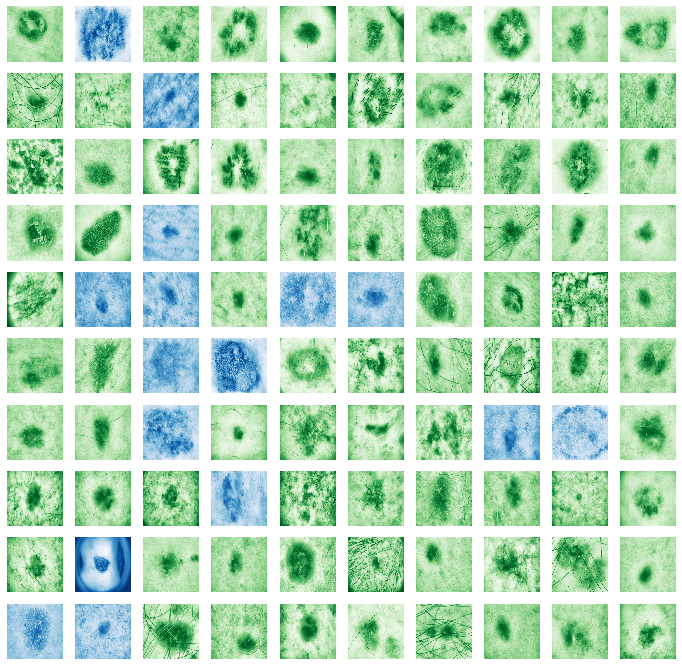

In [20]:
# size = (5,5)
fig, ax = plt.subplots(size[0], size[1], figsize=(12,12))
k = 0
for i in range(size[0]):
    for j in range(size[1]):
        if cond[k]:
            ax[i,j].imshow(norm_data[k], 'Blues_r', vmax=255,vmin=0)
        else:
            ax[i,j].imshow(norm_data[k], 'Greens_r', vmax=255,vmin=0)
        ax[i,j].axis('off')
        k+=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: circle is deprecated in favor of disk.circle will be removed in version 0.19
  after removing the cwd from sys.path.


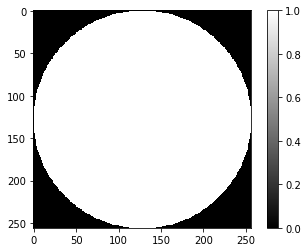

In [5]:
from skimage.draw import circle

mask = np.zeros((256,256))
rr,cc = circle(128, 128, 128)

mask[rr,cc] = 1
plt.imshow(mask, 'gray', vmax=1,vmin=0)
plt.colorbar()

(0, 3757.95)

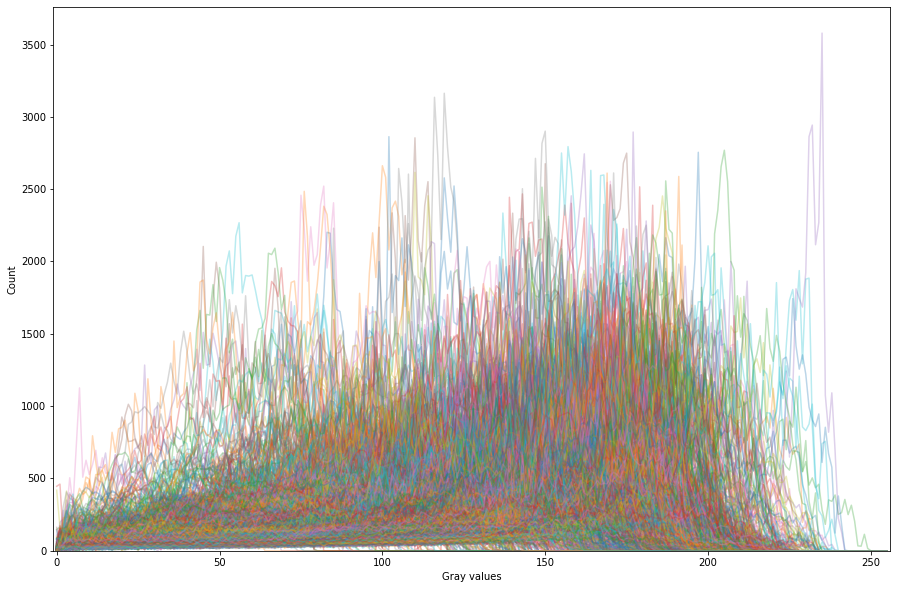

In [12]:
# BLUR
def blur(img):
    nani = cv2.GaussianBlur(img,(63,63),0)
    return nani

blur_data = [blur(img) for img in data]
nblur_data = [norm_hist(img) for img in blur_data]

mnb_data = [(img*mask)-(1-mask) for img in nblur_data]

blur_Hs = []

for k in range(N):
    h = np.zeros(256)
    i = 0
    for val in np.unique(mnb_data[k]):
        if val != -1:
            h[i] = np.sum(mnb_data[k] == val)
            i+=1
    blur_Hs += [h]

plt.figure(figsize=(15,10))
for i in range(N): 
    plt.plot(blur_Hs[i], alpha=0.3)
plt.xlabel('Gray values')
plt.ylabel('Count')
plt.xlim(-1,256)
plt.ylim(0)

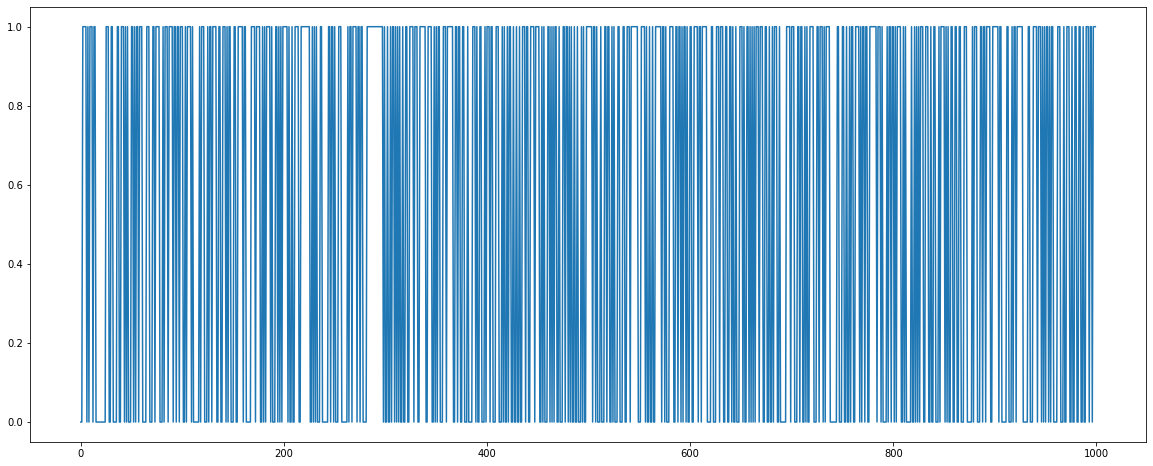

In [13]:
cond = []
split_point = 140
for h in blur_Hs:
    cond += [np.sum(h[:split_point]) > np.sum(h[split_point:])]

plt.figure(figsize=(20,8))
plt.plot(cond)

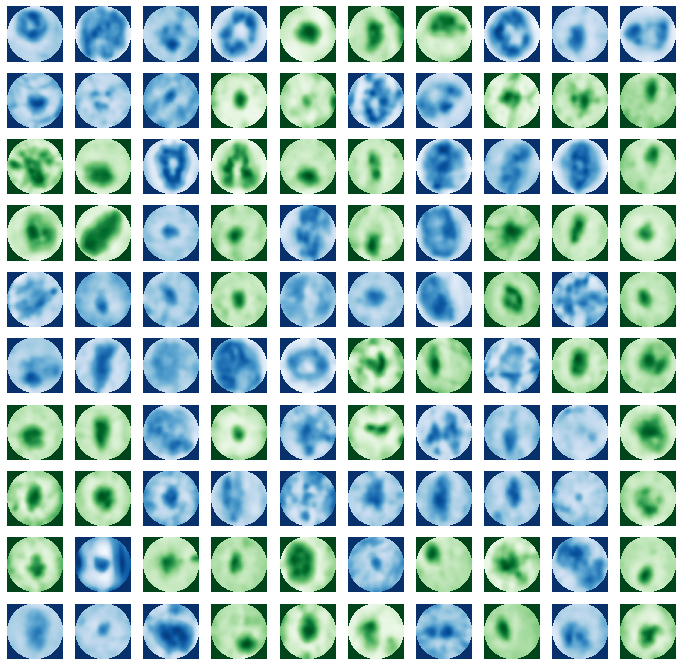

In [91]:
# size = (5,5)
fig, ax = plt.subplots(size[0], size[1], figsize=(12,12))
k = 0
for i in range(size[0]):
    for j in range(size[1]):
        if cond[k]:
            ax[i,j].imshow(mnb_data[k], 'Blues_r', vmax=255,vmin=0)
        else:
            ax[i,j].imshow(mnb_data[k], 'Greens_r',vmax=255,vmin=0)
        ax[i,j].axis('off')
        k+=1

# Datasets separation

In [10]:
n_y = np.array(cond)

n_dots = nevus_imgs[n_y]
n_blob = nevus_imgs[n_y== False]

print('Dots:',n_dots.shape)
print('Blob:',n_blob.shape)

Dots: (561, 256, 256)
Blob: (439, 256, 256)


In [14]:
m_y = np.array(cond)
m_dots = melanoma_imgs[m_y]
m_blob = melanoma_imgs[m_y== False]

print('Dots:',m_dots.shape)
print('Blob:',m_blob.shape)

Dots: (542, 256, 256)
Blob: (458, 256, 256)


In [15]:
'''
Data prepearing
'''
X_dots = np.concatenate((n_dots, m_dots))
y_dots = np.zeros(X_dots.shape[0])
y_dots[n_dots.shape[0]:] = 1
print('Dots X\y shapes: ',X_dots.shape, y_dots.shape)

X_blob = np.concatenate((n_blob, m_blob))
y_blob = np.zeros(X_blob.shape[0])
y_blob[n_blob.shape[0]:] = 1
print('Blobs X\y shapes:',X_blob.shape, y_blob.shape)


Dots X\y shapes:  (1103, 256, 256) (1103,)
Blobs X\y shapes: (897, 256, 256) (897,)


In [16]:
'''
Train-test split
'''
from sklearn.model_selection import train_test_split

X_dots = np.array([img.reshape(256,256,1)/255 for img in X_dots])
X_blob = np.array([img.reshape(256,256,1)/255 for img in X_blob])

Xd_train, Xd_test, yd_train, yd_test = train_test_split(X_dots,y_dots, test_size=0.2, random_state=42)
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_blob,y_blob, test_size=0.2, random_state=42)

# Dots-net construction

In [17]:
import tensorflow

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

print(tensorflow.__version__)
print("Num GPUs Available: ", len(tensorflow.config.experimental.list_physical_devices('GPU')))

tensorflow.debugging.set_log_device_placement(True)
gpus = tensorflow.config.experimental.list_physical_devices('GPU')
tensorflow.config.experimental.set_memory_growth(gpus[0], True)

1.15.2
Num GPUs Available:  1


In [22]:
'''
Define plot training function
'''
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, label='Training acc')
    plt.plot(epochs, val_acc, label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.title('Training and validation loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

In [32]:
# My model
model = models.Sequential()

model.add(layers.Conv2D(2, (2,2), activation='relu', input_shape=(256,256,1)))
model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(32,(2,2), activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(32,(2,2), activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 255, 255, 2)       10        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 127, 127, 2)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 32258)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32258)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 258072    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 258,091
Trainable params: 258,091
Non-trainable params: 0
________________________________________________

In [36]:
history = model.fit(
    Xd_train,
    yd_train,
    epochs = 100,
    validation_split=0.2)

Train on 705 samples, validate on 177 samples
Epoch 1/100
705/705 [==============================] - 0s 314us/sample - loss: 0.3148 - acc: 0.9064 - val_loss: 0.8169 - val_acc: 0.4915
Epoch 2/100
705/705 [==============================] - 0s 294us/sample - loss: 0.3089 - acc: 0.9035 - val_loss: 0.8426 - val_acc: 0.5141
Epoch 3/100
705/705 [==============================] - 0s 304us/sample - loss: 0.2885 - acc: 0.9078 - val_loss: 0.8407 - val_acc: 0.5085
Epoch 4/100
705/705 [==============================] - 0s 294us/sample - loss: 0.2830 - acc: 0.9248 - val_loss: 0.8276 - val_acc: 0.5198
Epoch 5/100
705/705 [==============================] - 0s 314us/sample - loss: 0.3111 - acc: 0.9021 - val_loss: 0.8660 - val_acc: 0.5198
Epoch 6/100
705/705 [==============================] - 0s 322us/sample - loss: 0.2958 - acc: 0.9078 - val_loss: 0.8392 - val_acc: 0.5085
Epoch 7/100
705/705 [==============================] - 0s 296us/sample - loss: 0.2732 - acc: 0.9220 - val_loss: 0.8516 - val_acc: 0.

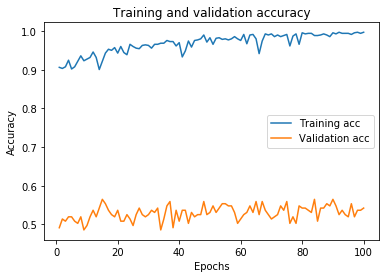

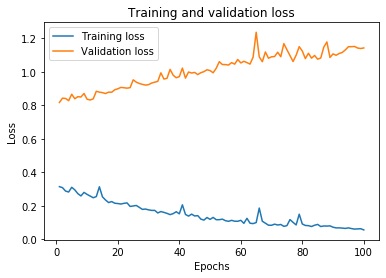

In [37]:
plot_history(history)

In [38]:
# Test
test_loss, test_acc = model.evaluate(Xd_test, yd_test)
print('Acc: {:6.3f}, Loss: {:6.3f}'.format(test_acc, test_loss))

221/221 [==============================] - 0s 187us/sample - loss: 1.2289 - acc: 0.5113
Acc:  0.511, Loss:  1.229


# Blob-net construction

In [69]:
# My model
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(256,256,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(2,2), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
# model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 61, 61, 128)       32896     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 115200)          

In [67]:
history = model.fit(
    Xb_train,
    yb_train,
    epochs = 40,
    validation_split=0.2)

Train on 573 samples, validate on 144 samples
Epoch 1/40
573/573 [==============================] - 1s 2ms/sample - loss: 0.8076 - acc: 0.4747 - val_loss: 0.6951 - val_acc: 0.4931
Epoch 2/40
573/573 [==============================] - 1s 1ms/sample - loss: 0.6942 - acc: 0.4729 - val_loss: 0.6932 - val_acc: 0.5139
Epoch 3/40
573/573 [==============================] - 1s 1ms/sample - loss: 0.6918 - acc: 0.5288 - val_loss: 0.7446 - val_acc: 0.4931
Epoch 4/40
573/573 [==============================] - 1s 1ms/sample - loss: 0.7010 - acc: 0.4921 - val_loss: 0.6936 - val_acc: 0.5000
Epoch 5/40
573/573 [==============================] - 1s 1ms/sample - loss: 0.6943 - acc: 0.4677 - val_loss: 0.6932 - val_acc: 0.4931
Epoch 6/40
573/573 [==============================] - 1s 1ms/sample - loss: 0.6931 - acc: 0.5218 - val_loss: 0.6932 - val_acc: 0.4931
Epoch 7/40
573/573 [==============================] - 1s 1ms/sample - loss: 0.6930 - acc: 0.5218 - val_loss: 0.6932 - val_acc: 0.4931
Epoch 8/40
573/5

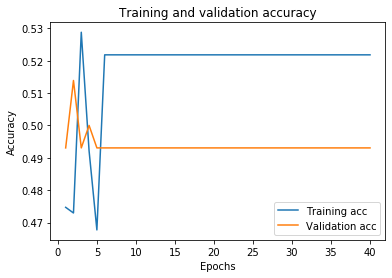

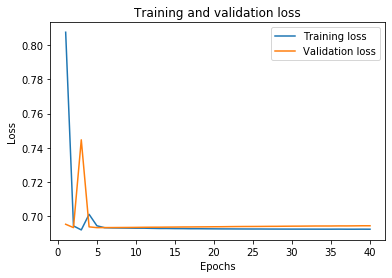

221/221 [==============================] - 0s 469us/sample - loss: 0.6959 - acc: 0.4706
Acc:  0.471, Loss:  0.696


In [68]:
plot_history(history)
# Test
test_loss, test_acc = model.evaluate(Xd_test, yd_test)
print('Acc: {:6.3f}, Loss: {:6.3f}'.format(test_acc, test_loss))